In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
wifi_df = pd.read_excel("./Datasets/Wifi Data.xlsx")

In [3]:
wifi_df.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.65831,-73.94406,Outdoor,Brooklyn,3,BK60
1,2,BK,Limited Free,ALTICEUSA,40.65800,-73.94723,Outdoor,Brooklyn,3,BK60
2,3,BK,Limited Free,ALTICEUSA,40.65800,-73.94723,Outdoor,Brooklyn,3,BK60
3,4,BK,Limited Free,ALTICEUSA,40.65743,-73.94716,Outdoor,Brooklyn,3,BK60
4,5,BK,Limited Free,ALTICEUSA,40.65743,-73.94716,Outdoor,Brooklyn,3,BK60


In [4]:
wifi_df['OBJECTID'].nunique()
wifi_df.drop(['OBJECTID'],inplace=True,axis=1)
# Dropping object id as each row has a unique value and it is not providing any useful information for analysis.

In [5]:
for col in wifi_df.columns:
#     print('column',col)
    print(wifi_df[col].value_counts())

MN    1204
BK     595
QU     415
BX     257
SI      95
Name: Borough, dtype: int64
Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64
LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64
40.687191    14
40.812681     8
40.710250     8
40.693636     7
40.690883     7
             ..
40.570195     1
40.571268     1
40.572313     1
40.573338     1
40.775443     1
Name: Latitude, Length: 2390, dtype: int64
-73.769559    14
-73.939357     8
-73.997980     8
-73.914138     7
-73.987162     7
              ..

In [6]:
## What is frequency distribution of features?

2) Using appropriate data visualization answer the following:

a. Plot the providers vs number of all wi-fi hotspots they have in operation? Who has the
highest installations?


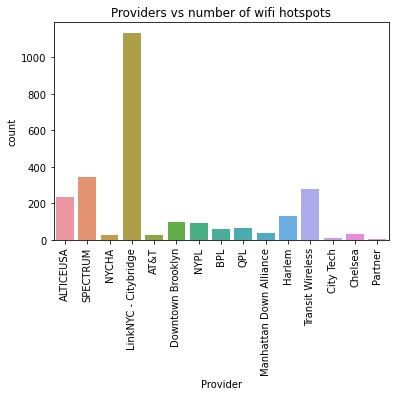

In [7]:
sns.countplot(x=wifi_df['Provider']).set(title = "Providers vs number of wifi hotspots")
plt.xticks(rotation=90)
plt.show()
# plt.Title("Providers vs number of wifi hotspots")

In [8]:
print("LinkNYC-Citybridge has the highest installations.")

LinkNYC-Citybridge has the highest installations.


b. Plot providers vs number of free wifi hotspots.


In [9]:
# Fetch the free wifi hotspots by provider
by_provider_free=wifi_df[wifi_df['Type']=='Free'].groupby(['Provider'])['Type'].count()

In [10]:
df_provider_free= pd.DataFrame({'Provider':by_provider_free.index,'Free hotspots':by_provider_free.values})

In [11]:
df_provider_free

,Provider,Free hotspots
0,AT&T,26
1,BPL,59
2,Chelsea,30
3,City Tech,11
4,Downtown Brooklyn,100
5,Harlem,128
6,LinkNYC - Citybridge,1134
7,Manhattan Down Alliance,36
8,NYCHA,28
9,NYPL,90


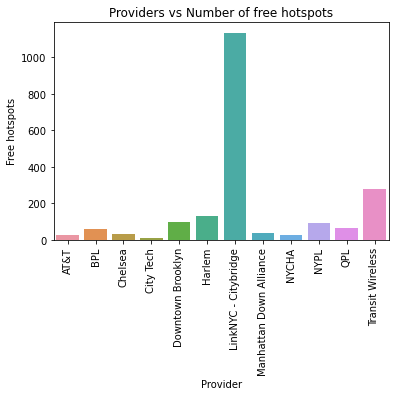

In [12]:
sns.barplot(data=df_provider_free,y='Free hotspots',x='Provider').set(title="Providers vs Number of free hotspots")
plt.xticks(rotation = 90)
plt.show()

c. Are there any provider(s) who do not provide free wifi?

In [13]:
#Get the list of wifi providers
providers = list(wifi_df['Provider'].unique())
free_providers = set(df_provider_free['Provider'])

In [14]:
result = [provider for provider in providers if provider not in free_providers]

In [15]:
print("Providers who dont provide free wifi",result)

Providers who dont provide free wifi ['ALTICEUSA', 'SPECTRUM', 'Partner']


d. Which Location type (Location_T) are most common and least common? 

In [16]:
wifi_df['Location_T'].value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

In [17]:
print('Most common Location type',wifi_df['Location_T'].value_counts().idxmax())
print('Least common Location type',wifi_df['Location_T'].value_counts().idxmin())

Most common Location type Outdoor Kiosk
Least common Location type Outdoor TWC Aerial


e. How many free “indoor” and “outdoor” hotspots are there? Which companies have the
highest number of Outdoor Free installations

In [18]:
#Indoor/outdoor hotspots by provider
by_type= wifi_df[wifi_df['Type']=='Free'].groupby(['Location_T'])['Location_T'].count()
print(by_type)

Location_T
Library            214
Outdoor            359
Outdoor Kiosk     1134
Subway Station     276
Name: Location_T, dtype: int64


In [19]:
print('There is no free indoor hotspots')

There is no free indoor hotspots


In [20]:
print("No. of free outdoor hotspots",by_type.Outdoor)

No. of free outdoor hotspots 359


In [21]:
by_provider_location = wifi_df[(wifi_df['Location_T']=='Outdoor') & (wifi_df['Type']=='Free')].groupby(['Provider','Location_T'])['Location_T'].count()
by_provider_location

Provider                 Location_T
AT&T                     Outdoor        26
Chelsea                  Outdoor        30
City Tech                Outdoor        11
Downtown Brooklyn        Outdoor       100
Harlem                   Outdoor       128
Manhattan Down Alliance  Outdoor        36
NYCHA                    Outdoor        28
Name: Location_T, dtype: int64

In [22]:
print("Provider who have maximum free outdoor installations ",by_provider_location.idxmax()[0])

Provider who have maximum free outdoor installations  Harlem
